Mount Google Drive to Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Basic python library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read The Datasets

In [4]:
variant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_variants.csv')
print('Total Number of Datapoints: ', variant_df.shape[0])
print('Total Number of Features: ', variant_df.shape[1])
print('All Features Name: ', variant_df.columns.values)
variant_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  4
All Features Name:  ['ID' 'Gene' 'Variation' 'Class']


,ID,Gene,Variation,Class
647,647,CDKN2A,D84G,4
2979,2979,KIT,H697Y,7
619,619,FBXW7,S227A,4
2361,2361,STK11,Deletion,1
1808,1808,ARAF,G322S,7


In [5]:
text_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Personalized Medicine Redefining Cancer Treatment/training_text.csv', sep='\|\|', engine='python', names=['ID', 'TEXT'], skiprows=1)
print('Total Number of Datapoints: ', text_df.shape[0])
print('Total Number of Features: ', text_df.shape[1])
print('All Features Name: ', text_df.columns.values)
text_df.sample(5)

Total Number of Datapoints:  3321
Total Number of Features:  2
All Features Name:  ['ID' 'TEXT']


,ID,TEXT
2999,2999,Mastocytosis is a heterogeneous group of clini...
1073,1073,The forkhead box (Fox) superfamily of transcri...
2196,2196,ABSTRACT To look for a direct role of ultravi...
791,791,Resistance to HER2-targeted therapies remains ...
1336,1336,The fibroblast growth factor receptor (FGFR) c...


Cleanup Raw Text  

In [6]:
import re
from wordcloud import STOPWORDS, WordCloud

In [7]:
stop_words = set(STOPWORDS)

def clean_text(total_text, index, column):
  if type(total_text) is not int:
    text = ''

    # replace every special char with space
    total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)

    # replace multiple spaces with single space
    total_text = re.sub('\s+', ' ', total_text)

    # converting all the chars into lower-case.
    total_text = total_text.lower()

    # Combining all the above sentence

    from tqdm import tqdm
    # tqdm is for printing the status bar

    for word in tqdm(total_text.split()):
    # if the word is a not a stop word then retain that word from the data
      if not word in stop_words:
        text += word + ' '

    text_df[column][index] = text

    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    list_of_sentence=[]
    for  sentence in total_text:
        words_in_sentence=[]
        for words in sentence.split():
            words_in_sentence.append(porter.stem(words))

        list_of_sentence.append(' '.join(words_in_sentence))
    return(list_of_sentence)

Preprocess text

In [8]:
for index, row in text_df.iterrows():
  if type(row['TEXT']) is str:
    clean_text(row['TEXT'], index, 'TEXT')
  else:
    print('There is no text description for ID: ', index)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 16741/16741 [00:00<00:00, 879744.95it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 16102/16102 [00:00<00:00, 845180.50it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6066/6066 [00:00<00:00, 832847.17it/s]
<ipython-i

There is no text description for ID:  1109


100%|██████████| 15609/15609 [00:00<00:00, 832323.36it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 10176/10176 [00:00<00:00, 650618.70it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 5481/5481 [00:00<00:00, 835962.92it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

There is no text description for ID:  1277


100%|██████████| 21096/21096 [00:00<00:00, 998454.49it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 28185/28185 [00:00<00:00, 1085680.18it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 12999/12999 [00:00<00:00, 923096.26it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

There is no text description for ID:  1407


100%|██████████| 5664/5664 [00:00<00:00, 908645.55it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 5664/5664 [00:00<00:00, 750506.66it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 3608/3608 [00:00<00:00, 658617.26it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

There is no text description for ID:  1639


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6923/6923 [00:00<00:00, 912143.20it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 13245/13245 [00:00<00:00, 436021.95it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 6923/6923 [00:00<00:00, 304826.54it/s]
<ipython-inp

There is no text description for ID:  2755


100%|██████████| 7462/7462 [00:00<00:00, 636614.86it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 20861/20861 [00:00<00:00, 869090.02it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df[column][index] = text
100%|██████████| 24387/24387 [00:00<00:00, 872067.08it/s]
<ipython-input-7-69a3375a3258>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [9]:
#merging both gene_variations and text data based on ID
df = pd.merge(variant_df, text_df, on='ID', how='left')
df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [10]:
df[df.isnull().any(axis=1)]

,ID,Gene,Variation,Class,TEXT
1109,1109,FANCA,S1088F,1,NaN
1277,1277,ARID5B,Truncating Mutations,1,NaN
1407,1407,FGFR3,K508M,6,NaN
1639,1639,FLT1,Amplification,6,NaN
2755,2755,BRAF,G596C,7,NaN


In [11]:
df.loc[df['TEXT'].isnull(), 'TEXT'] = df['Gene']+' '+df['Variation']

In [12]:
df[df['ID']==1407]

,ID,Gene,Variation,Class,TEXT
1407,1407,FGFR3,K508M,6,FGFR3 K508M


In [13]:
df.sample(5)

,ID,Gene,Variation,Class,TEXT
2138,2138,KEAP1,R320Q,4,nrf2 transcription factor mediates stress resp...
2768,2768,BRAF,T599I,7,30 mutations b raf gene associated human cance...
1562,1562,ALK,R1231Q,3,era personalized medicine understanding molecu...
2065,2065,SOX9,H65Y,4,humans mutations sox9 result skeletal malforma...
1130,1130,MET,D1010H,2,met proto oncogene receptor tyrosine kinase ge...


In [14]:
df['Gene_Variation_TEXT'] = df['Gene']+' '+df['Variation']+' '+df['TEXT']

Define input and output/target features

In [15]:
y = df['Class']
X = df['Gene_Variation_TEXT']

In [16]:
X

0       FAM58A Truncating Mutations cyclin dependent k...
1       CBL W802* abstract background non small cell l...
2       CBL Q249E abstract background non small cell l...
3       CBL N454D recent evidence demonstrated acquire...
4       CBL L399V oncogenic mutations monomeric casita...
                              ...                        
3316    RUNX1 D171N introduction myelodysplastic syndr...
3317    RUNX1 A122* introduction myelodysplastic syndr...
3318    RUNX1 Fusions runt related transcription facto...
3319    RUNX1 R80C runx1 aml1 gene frequent target chr...
3320    RUNX1 K83E frequent mutations associated leuke...
Name: Gene_Variation_TEXT, Length: 3321, dtype: object

Split train and test data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2656,), (665,), (2656,), (665,))

Apply Count Vectorizer to embed the words in n dimentional space of Vector

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,3))

Fit and Transform Count Vectorizer for Visualization

In [20]:
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [21]:
X_train.shape, X_test.shape

((2656, 10000), (665, 10000))

In [22]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(penalty='l2', C=10, class_weight='balanced', random_state=42, solver='lbfgs', n_jobs=-1)
LR.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced', n_jobs=-1, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Logistic Regression Classification on Train Data
y_pred_train = LR.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)

In [25]:
# Show the over all performance on train data
print('Train Data of LR: ','\n')
print('Accuracy on Train Data: ', accuracy_train, '\n')
print('Classification Report on Train Data: ', '\n', '\n', classification_report(y_train, y_pred_train))

Train Data of LR:  

Accuracy on Train Data:  0.8539156626506024 

Classification Report on Train Data:  
 
               precision    recall  f1-score   support

           1       0.87      0.81      0.84       454
           2       0.87      0.92      0.89       356
           3       0.45      0.90      0.60        70
           4       0.93      0.86      0.90       547
           5       0.56      0.79      0.65       192
           6       0.85      0.88      0.86       230
           7       0.98      0.84      0.90       759
           8       0.86      1.00      0.92        18
           9       0.91      1.00      0.95        30

    accuracy                           0.85      2656
   macro avg       0.81      0.89      0.84      2656
weighted avg       0.88      0.85      0.86      2656



In [26]:
# Logistic Regression Classification on Test Data
y_pred_test = LR.predict(X_test)
accuracy_test = accuracy_score(y_pred_test, y_test)

In [27]:
# Show the over all performance on test data
print('Test Data of LR: ','\n')
print('Accuracy on Test Data: ', accuracy_test, '\n' )
print('Classification Report on Test Data: ', '\n','\n', classification_report(y_test, y_pred_test))

Test Data of LR:  

Accuracy on Test Data:  0.6225563909774436 

Classification Report on Test Data:  
 
               precision    recall  f1-score   support

           1       0.58      0.61      0.60       114
           2       0.55      0.52      0.53        96
           3       0.46      0.68      0.55        19
           4       0.70      0.65      0.68       139
           5       0.34      0.42      0.38        50
           6       0.70      0.69      0.70        45
           7       0.72      0.69      0.71       194
           8       0.00      0.00      0.00         1
           9       1.00      0.57      0.73         7

    accuracy                           0.62       665
   macro avg       0.56      0.54      0.54       665
weighted avg       0.63      0.62      0.63       665



In [28]:
# Apply Confusion Matrix
from sklearn.metrics import confusion_matrix
c_train = confusion_matrix(y_pred_train, y_train)
c_test  = confusion_matrix(y_pred_test, y_test)

In [29]:
# Results of Confusion Matrix on train and test data
print('Confusion Matrix on Train Data: ','\n', c_train, '\n')
print('Confusion Matrix on Test  Data: ', '\n', c_test)

Confusion Matrix on Train Data:  
 [[370   2   0  30  15   8   2   0   0]
 [  1 326   0   1   1   0  45   0   0]
 [  5   2  63  19   8   2  40   0   0]
 [ 22   0   3 473   6   1   3   0   0]
 [ 43   8   3  22 151  16  27   0   0]
 [ 12   7   0   2  11 203   5   0   0]
 [  0   9   1   0   0   0 634   0   0]
 [  1   2   0   0   0   0   0  18   0]
 [  0   0   0   0   0   0   3   0  30]] 

Confusion Matrix on Test  Data:  
 [[ 70   3   1  22  13   5   5   0   1]
 [  5  50   0   5   2   2  27   0   0]
 [  1   0  13   4   1   0   9   0   0]
 [ 19   1   2  91   8   0   9   0   0]
 [  8   9   0   8  21   7   8   0   1]
 [  4   1   1   3   2  31   2   0   0]
 [  7  32   2   6   3   0 134   1   0]
 [  0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   0   4]]


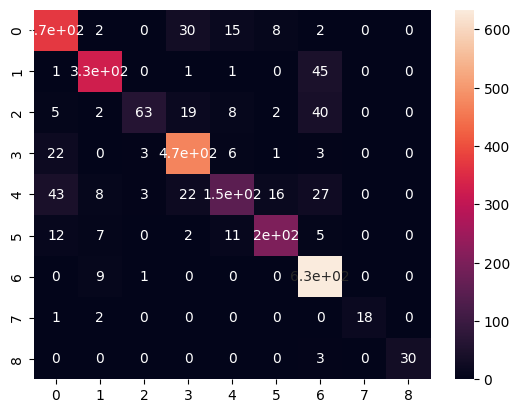

In [30]:
# Apply heatmap on train Data
sns.heatmap(c_train, annot=True)
plt.show()

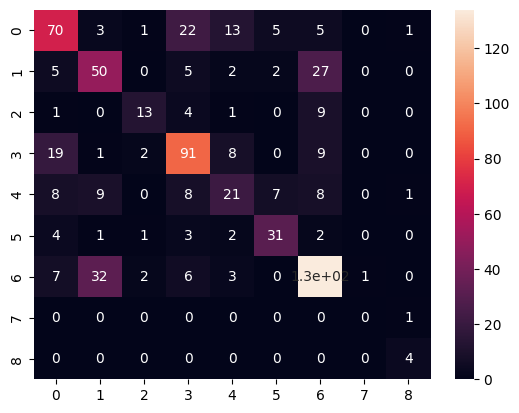

In [31]:
# Apply heatmap on test Data
sns.heatmap(c_test, annot=True)
plt.show()